# 1. Check Dependencies are Installed in our venv

In [1]:
!pip list #check a list of Dependencies

Package                       Version
----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcal

# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/

In [3]:
!pip list #check list agin

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [4]:
import tensorflow as tf #import tensorflow as tf
import os #import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpuList = tf.config.experimental.list_physical_devices('GPU') # get all of physical GPU devices allowcated for tensaflow
for gpu in gpuList: 
    tf.config.experimental.set_memory_growth(gpu, True) # limit the GPU memory growth getting one by one from gpu List

In [6]:
tf.config.list_physical_devices('GPU') #check physical GPU devices

[]

# 2. Delete any questionable photos.

In [7]:
import cv2
import imghdr

In [8]:
data_directory = '..\data' #give path of data directory

In [9]:
image_types = ['jpeg','jpg', 'bmp', 'png'] #store extentions of exist data types

In [10]:
for image_class in os.listdir(data_directory): #get list of directories inside the data directory ex:-['happy','sad']
    for image in os.listdir(os.path.join(data_directory, image_class)):#get every single image from data sub directories -> '../data/happy' -> 465464.png
        image_path = os.path.join(data_directory, image_class, image)#create a new path for image inside of data sub directory 
        try: 
            img = cv2.imread(image_path)#loads an image from the specified file
            tip = imghdr.what(image_path)
            if tip not in image_types: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)# os will remove image from listed image path in here
        except Exception as e: 
            print('Issue with image {}'.format(image_path))# if got an error exception will print it is as an issue

# 3. Load Data

In [11]:
import numpy as np #import numpy as np
from matplotlib import pyplot as plt #import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_directory) #Generates a tf.data.Dataset from image files in a directory.

Found 161 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator() #image_dataset_from_directory returns a Dataset object and get it as an as_numpy_iterator

In [14]:
batch = data_iterator.next() #To get the next batch, and the next image

In [15]:
batch[0].shape

(32, 256, 256, 3)

In [16]:
# Class 0 - ANGRY
# Class 1 - HAPPY
# Class 2 - SAD
batch[1]

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

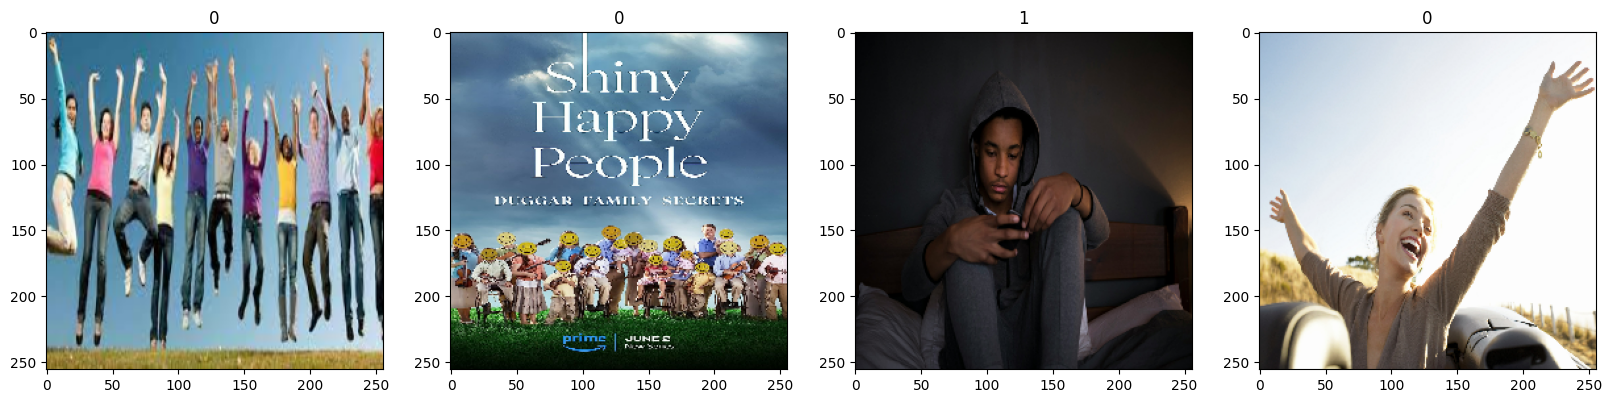

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) # create common layouts of subplots, including the enclosing figure object, in a single call.
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))#do visualization in here
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))#each element of this dataset, and returns a new dataset containing the transformed elements (adding 1 to each element, or projecting a subset of element components)

In [19]:
data.as_numpy_iterator().next() #To get the next batch, and the next image

(array([[[[0.9941176 , 0.9941176 , 0.9941176 ],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99019605, 0.99019605, 0.99019605],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.9941176 , 0.9941176 , 0.9941176 ],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.9941176 , 0.9941176 , 0.9941176 ],
          [0.99215686, 0.99215686, 0.99215686],
          [0.9943628 , 0.9943628 , 0.9943628 ],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[0.99215686, 0.99215686, 0.99215686],
          [0.99215

In [20]:
len(data)

6

# 5. Split Data

In [21]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size+val_size+test_size

5

In [23]:
train = data.take(train_size) #train partition
val = data.skip(train_size).take(val_size) #validate partition
test = data.skip(train_size+val_size).take(test_size) #test partition

In [24]:
len(test)

0

# 6. Build Deep Learning Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [30]:
logdir='..\logs'

In [31]:
logdir

'..\\logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
logdir

'..\\logs'

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])#get predictions

Epoch 1/20
4/4 [==============================] - 11s 2s/step - loss: 0.7262 - accuracy: 0.5234 - val_loss: 0.7653 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.6936 - accuracy: 0.5469 - val_loss: 0.4992 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.5792 - accuracy: 0.6094 - val_loss: 0.6022 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.5547 - accuracy: 0.7422 - val_loss: 0.5171 - val_accuracy: 0.6562
Epoch 5/20
4/4 [==============================] - 11s 3s/step - loss: 0.5078 - accuracy: 0.6797 - val_loss: 0.5305 - val_accuracy: 0.8438
Epoch 6/20
4/4 [==============================] - 15s 3s/step - loss: 0.4281 - accuracy: 0.8359 - val_loss: 0.3360 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 13s 3s/step - loss: 0.4858 - accuracy: 0.7188 - val_loss: 0.3765 - val_accuracy: 0.9062
Epoch 8/20
4/4 [=====================

# 8. Plot Performance

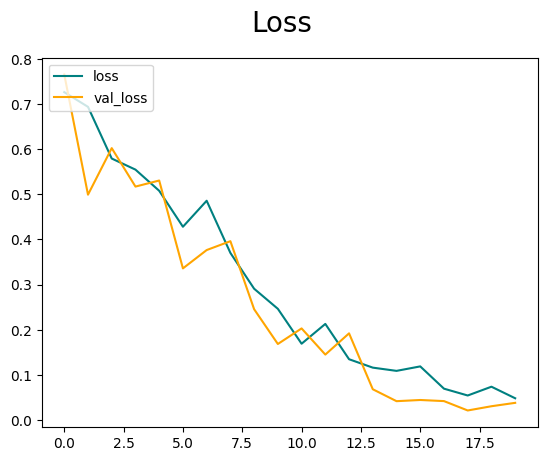

In [35]:
#find loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

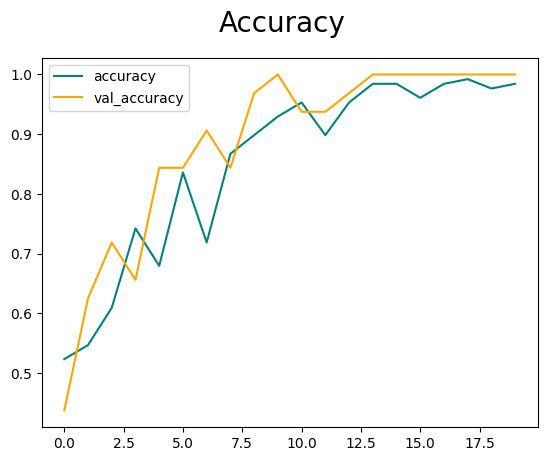

In [36]:
# find accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [41]:
import cv2

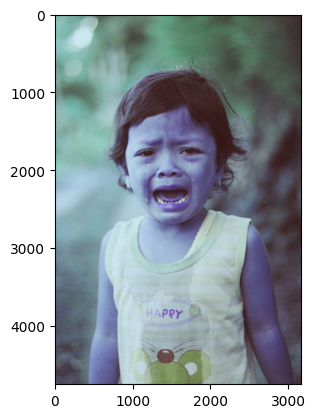

In [42]:
img = cv2.imread('arwan-sutanto-H566W24FyL8-unsplash.jpg')
plt.imshow(img)
plt.show()

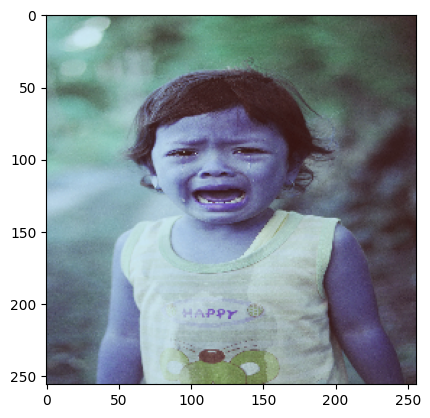

In [43]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
resize.shape
np.expand_dims (resize, 0).shape

(1, 256, 256, 3)

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 256ms/step


In [46]:
print(yhat)

[[0.9367069]]


In [47]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('..\models','imageclassifier.h5'))

In [50]:
new_model = load_model('..\models\imageclassifier.h5')

In [51]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 236ms/step


array([[0.9367069]], dtype=float32)